<a href="https://colab.research.google.com/github/alejandracardonavelasco/ML-/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Lab 9**

In [1]:
import torch
import torchvision

transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(), #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)   #we do shuffle it to give more randomizations to training epochs

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)

class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = torch.nn.Flatten()
        self.linear1 = torch.nn.Linear(28 * 28, 1024)
        self.linear2 = torch.nn.Linear(1024, 2048)
        self.linear3 = torch.nn.Linear(2048, 256)
        self.linear4 = torch.nn.Linear(256, 10)
        self.dropout = torch.nn.Dropout(0.05)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.linear4(x)
        x = self.dropout(x)
        return x


# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = MLP().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.001)   #initial and fixed learning rate of 0.001.

net.train()    #it notifies the network layers (especially batchnorm or dropout layers, which we don't use in this example) that we are doing traning
for epoch in range(8):  #  an epoch is a training run through the whole data set

    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device)  #explicitly moving the data to the target device
        batch_labels = batch_labels.to(device)

        #batch_inputs.squeeze(1)     #alternatively if not for a Flatten layer, squeeze() could be used to remove the second order of the tensor, the Channel, which is one-dimensional (this index can be equal to 0 only)

        optimizer.zero_grad()

        batch_outputs = net(batch_inputs)   #this line calls the forward(self, x) method of the MLP object. Please note, that the last layer of the MLP is linear
                                            #and MLP doesn't apply
                                            #the nonlinear activation after the last layer
        loss = torch.nn.functional.cross_entropy(batch_outputs, batch_labels, reduction = "mean") #instead, nonlinear softmax is applied internally in THIS loss function
        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()       #this computes gradients as we have seen in previous workshops
        optimizer.step()     #but this line in fact updates our neural network.
                                ####You can experiment - comment this line and check, that the loss DOE

Working on cuda
epoch: 0 batch: 0 current batch loss: 2.303389072418213
epoch: 0 batch: 1 current batch loss: 2.0785698890686035
epoch: 0 batch: 2 current batch loss: 1.6292552947998047
epoch: 0 batch: 3 current batch loss: 1.0905388593673706
epoch: 0 batch: 4 current batch loss: 1.0290364027023315
epoch: 0 batch: 5 current batch loss: 1.3689908981323242
epoch: 0 batch: 6 current batch loss: 1.3522682189941406
epoch: 0 batch: 7 current batch loss: 0.7020230293273926
epoch: 0 batch: 8 current batch loss: 0.8644211888313293
epoch: 0 batch: 9 current batch loss: 0.698765218257904
epoch: 0 batch: 10 current batch loss: 0.6513224244117737
epoch: 0 batch: 11 current batch loss: 0.6297202706336975
epoch: 0 batch: 12 current batch loss: 0.5817939639091492
epoch: 0 batch: 13 current batch loss: 0.5278723239898682
epoch: 0 batch: 14 current batch loss: 0.5575594305992126
epoch: 0 batch: 15 current batch loss: 0.589316189289093
epoch: 0 batch: 16 current batch loss: 0.48640841245651245
epoch: 0 b

## **Task 1:** Generate a batch of 10 images, where each image is classified as one of the digits 0, 1, 2, ..., 9, starting from an initial batch of ten random Gaussian noise images.

Step 50, Loss: 2.1930
Step 100, Loss: 0.9021
Step 150, Loss: 0.2875
Step 200, Loss: 0.1284
Step 250, Loss: 0.0777
Step 300, Loss: 0.0549
Step 350, Loss: 0.0415
Step 400, Loss: 0.0329
Step 450, Loss: 0.0269
Step 500, Loss: 0.0224
Step 550, Loss: 0.0191
Step 600, Loss: 0.0165
Step 650, Loss: 0.0144
Step 700, Loss: 0.0128
Step 750, Loss: 0.0114
Step 800, Loss: 0.0103
Step 850, Loss: 0.0093
Step 900, Loss: 0.0085
Step 950, Loss: 0.0078
Step 1000, Loss: 0.0072
Step 1050, Loss: 0.0066
Step 1100, Loss: 0.0061
Step 1150, Loss: 0.0057
Step 1200, Loss: 0.0053
Step 1250, Loss: 0.0050
Step 1300, Loss: 0.0047
Step 1350, Loss: 0.0044
Step 1400, Loss: 0.0041
Step 1450, Loss: 0.0039
Step 1500, Loss: 0.0037
Step 1550, Loss: 0.0035
Step 1600, Loss: 0.0033
Step 1635, Loss: 0.0032


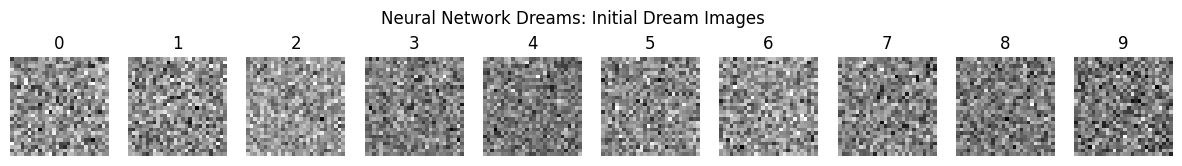

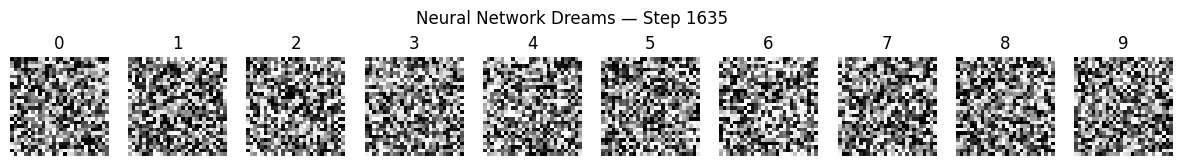

In [19]:
# We freeze the model
net.eval()
for param in net.parameters():
    param.requires_grad = False

# Dreaming inputs
dream_images = torch.nn.Parameter(torch.randn(10, 1, 28, 28, device=device))
target_labels = torch.arange(10, device=device)  # tensor([0, 1, 2, ..., 9])
optimizer = torch.optim.Adam([dream_images], lr=0.001)

import matplotlib.pyplot as plt

dream_images_cpu = dream_images.detach().cpu()
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(dream_images_cpu[i][0], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(i))
plt.suptitle("Neural Network Dreams: Initial Dream Images")
step = 0
plt.savefig(f"frame_{step:04d}_task1.png")

confidences = torch.zeros(10, device=device)
step = 0

while torch.all(confidences < 0.999):
    step += 1
    # Save the frames
    if step % 50 == 0:
      fig, axes = plt.subplots(1, 10, figsize=(15, 2))
      dream_images_cpu = dream_images.detach().cpu()
      for i in range(10):
            axes[i].imshow(dream_images_cpu[i][0], cmap='gray')
            axes[i].axis('off')
            axes[i].set_title(str(i))
      plt.suptitle(f"Neural Network Dreams — Step {step}")
      plt.savefig(f"frame_{step:04d}_task1.png")
      plt.close(fig)

    # Optimization process
    optimizer.zero_grad()
    outputs = net(dream_images)

    loss = torch.nn.functional.cross_entropy(outputs, target_labels)  # Encourage each image to be classified correctly
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        probs = torch.softmax(outputs, dim=1)
        confidences = probs[torch.arange(10), target_labels]

    # Clamp pixel range to prevent extreme values
    with torch.no_grad():
      dream_images.clamp_(-1.0, 1.0)

    if step % 50 == 0:
        print(f"Step {step}, Loss: {loss.item():.4f}")

print(f"Step {step}, Loss: {loss.item():.4f}")

# Final image
dream_images_cpu = dream_images.detach().cpu()
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(dream_images_cpu[i][0], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(i))
plt.suptitle(f"Neural Network Dreams — Step {step}")
plt.show()

We can verify that the images are being classified correctly:


In [17]:
with torch.no_grad():
    preds = torch.argmax(net(dream_images), dim=1)
    print("Predictions:", preds.tolist())


Predictions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [20]:
# Now we create an animation with the frames we saved
import imageio
import glob

frames = []
for filename in sorted(glob.glob("frame_*_task1.png")):
    frames.append(imageio.imread(filename))

# Save to MP4
imageio.mimsave("dreams.mp4", frames, fps=10)

from google.colab import files
files.download("dreams.mp4")


<ipython-input-20-a58f3a9ab739>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Question: Do the generated images resemble real MNIST digits? Why or why not?
No, they don't look like real MNIST digits.

The network's goal is not to generate human-readable digits, but to maximize its own internal confidence. The optimization process is pushing the input to activate certain neurons,it doesn't care if the image looks like a digit to you, only that the network outputs the correct class label.

Also, there's no regularization or constraint on visual realism.
We are not telling the model to produce natural shapes, just to maximize classification confidence. That can result in strange patterns or noisy textures that exploit how the network was trained.

## **Task 2:** Discuss, how you would approach a second task of generating an image that bares similarity to two or more digits simultaneously. Implement your idea to see the results.

Instead of maximizing the confidence for one class, we now want to simultaneously increase the confidence for two or more classes. This leads us to a multi-target optimization, where we combine multiple class objectives in a single loss.

In order to do this, we will use the code we did for task 1 but modifying the loss function. We will use binary cross-entropy with soft labels to simultaneously increase the model's confidence in multiple target classes, allowing us to generate a single image that the neural network classifies as resembling both digits at once.

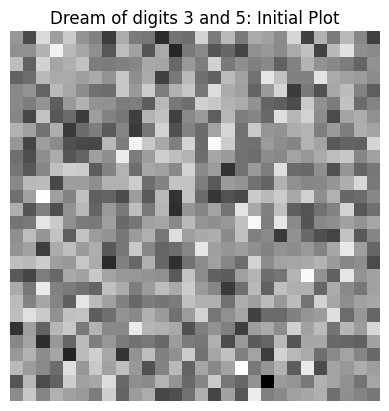

Step 50, Loss: 0.1715
Step 100, Loss: 0.1502
Step 150, Loss: 0.1454
Step 200, Loss: 0.1434
Step 250, Loss: 0.1424
Step 300, Loss: 0.1417
Step 350, Loss: 0.1412
Step 400, Loss: 0.1408
Step 450, Loss: 0.1405
Step 500, Loss: 0.1403
Step 550, Loss: 0.1401
Step 600, Loss: 0.1399
Step 650, Loss: 0.1398
Step 700, Loss: 0.1397
Step 750, Loss: 0.1396
Step 800, Loss: 0.1395
Step 850, Loss: 0.1395
Step 900, Loss: 0.1394
Step 950, Loss: 0.1393
Step 1000, Loss: 0.1393
Step 1050, Loss: 0.1392
Step 1100, Loss: 0.1392
Step 1150, Loss: 0.1392
Step 1200, Loss: 0.1391
Step 1250, Loss: 0.1391
Step 1300, Loss: 0.1391
Step 1350, Loss: 0.1391
Step 1400, Loss: 0.1390
Step 1450, Loss: 0.1390
Step 1500, Loss: 0.1390
Step 1550, Loss: 0.1390
Step 1600, Loss: 0.1390
Step 1650, Loss: 0.1389
Step 1700, Loss: 0.1389
Step 1750, Loss: 0.1389
Step 1800, Loss: 0.1389
Step 1850, Loss: 0.1389
Step 1900, Loss: 0.1389
Step 1950, Loss: 0.1389
Step 2000, Loss: 0.1388
Step 2050, Loss: 0.1388
Step 2100, Loss: 0.1388
Step 2150, L

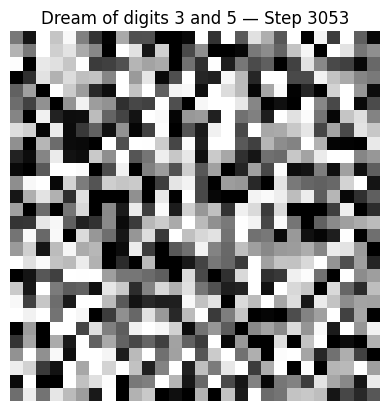

In [27]:
target_classes = [3, 5]
dream_images = torch.nn.Parameter(torch.randn(10, 1, 28, 28, device=device))
multi_digit_img = torch.nn.Parameter(torch.randn(1, 1, 28, 28, device=device))
optimizer = torch.optim.Adam([multi_digit_img], lr=0.001)

# Visualize final dreams
fig, ax = plt.subplots()
plt.imshow(multi_digit_img.detach().cpu()[0][0], cmap='gray')
plt.title(f"Dream of digits {target_classes[0]} and {target_classes[1]}: Initial Plot")
plt.axis('off')
step = 0
plt.savefig(f"frame{step:04d}t2.png")  # Save the frame
plt.show()

probs = torch.zeros(1, 10, device=device)

while (probs[0, target_classes[0]] + probs[0, target_classes[1]] < 0.999):
    step += 1
    # Save images
    if step % 50 == 0:
      fig, ax = plt.subplots()
      plt.imshow(multi_digit_img.detach().cpu()[0][0], cmap='gray')
      plt.title(f"Dream of digits {target_classes[0]} and {target_classes[1]} — Step {step}")
      plt.axis('off')
      plt.savefig(f"frame{step:04d}t2.png")  # Save the frame
      plt.close(fig)

    optimizer.zero_grad()
    output = net(multi_digit_img)              # Shape: [1, 10]
    probs = torch.nn.functional.softmax(output, dim=1)    # Turn logits into probabilities

    # Define soft target: 0.5 for class 3 and 0.5 for class 5
    soft_target = torch.zeros_like(probs)
    soft_target[0, 3] = 0.5
    soft_target[0, 5] = 0.5

    # Binary cross-entropy between predicted probs and soft target
    loss = torch.nn.functional.binary_cross_entropy(probs, soft_target)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        multi_digit_img.clamp_(-1.0, 1.0)

    if step % 50 == 0:
        print(f"Step {step}, Loss: {loss.item():.4f}")


import matplotlib.pyplot as plt

# Visualize final dreams
fig, ax = plt.subplots()
plt.imshow(multi_digit_img.detach().cpu()[0][0], cmap='gray')
plt.title(f"Dream of digits {target_classes[0]} and {target_classes[1]} — Step {step}")
plt.axis('off')
plt.show()
plt.close(fig)


In [28]:
# We create the animation
frames2 = []
for filename in sorted(glob.glob("frame*t2.png")):
    frames2.append(imageio.imread(filename))

# Save to MP4
imageio.mimsave("dreams2.mp4", frames2, fps=10)

files.download("dreams2.mp4")

<ipython-input-28-b25a83d3df95>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames2.append(imageio.imread(filename))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Task 3:** Repeat the previous tasks with an additional L2 penalty on noise within the images. Experiment with adding `lambda_l2 * dreamed_input_batch.pow(2).mean()` loss term, with `lambda_l2` being the penalty cooefficient within an exponential progression, say from 0.001 to 10.0


 L2 Penalty λ = 0.001
Step 0 — Loss: 5.2023, CE: 5.2013, L2: 0.0010
Step 50 — Loss: 1.8832, CE: 1.8827, L2: 0.0005
Step 100 — Loss: 0.5613, CE: 0.5608, L2: 0.0005
Step 150 — Loss: 0.1991, CE: 0.1986, L2: 0.0005
Step 200 — Loss: 0.1084, CE: 0.1080, L2: 0.0005
Step 250 — Loss: 0.0720, CE: 0.0715, L2: 0.0005
Step 300 — Loss: 0.0525, CE: 0.0521, L2: 0.0005
Step 350 — Loss: 0.0407, CE: 0.0403, L2: 0.0005
Step 400 — Loss: 0.0328, CE: 0.0323, L2: 0.0005
Step 450 — Loss: 0.0272, CE: 0.0267, L2: 0.0005
Step 500 — Loss: 0.0231, CE: 0.0226, L2: 0.0005
Step 550 — Loss: 0.0199, CE: 0.0194, L2: 0.0005
Step 600 — Loss: 0.0174, CE: 0.0169, L2: 0.0005
Step 650 — Loss: 0.0154, CE: 0.0149, L2: 0.0005
Step 700 — Loss: 0.0137, CE: 0.0133, L2: 0.0005
Step 750 — Loss: 0.0124, CE: 0.0119, L2: 0.0005
Step 800 — Loss: 0.0112, CE: 0.0107, L2: 0.0005
Step 850 — Loss: 0.0102, CE: 0.0098, L2: 0.0005
Step 900 — Loss: 0.0094, CE: 0.0089, L2: 0.0005
Step 950 — Loss: 0.0087, CE: 0.0082, L2: 0.0005
Step 1000 — Loss: 0.

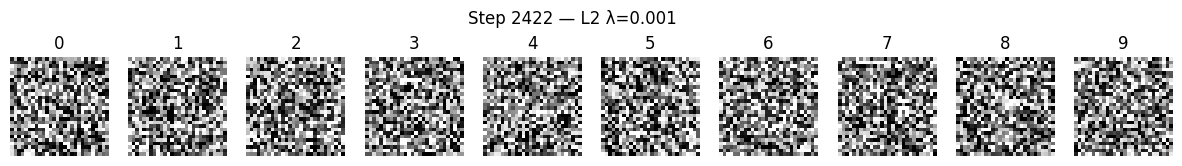

Predictions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

 L2 Penalty λ = 0.01
Step 0 — Loss: 5.9966, CE: 5.9867, L2: 0.0100
Step 50 — Loss: 2.6402, CE: 2.6352, L2: 0.0050
Step 100 — Loss: 1.2716, CE: 1.2667, L2: 0.0049
Step 150 — Loss: 0.4455, CE: 0.4407, L2: 0.0049
Step 200 — Loss: 0.1441, CE: 0.1393, L2: 0.0048
Step 250 — Loss: 0.0814, CE: 0.0766, L2: 0.0048
Step 300 — Loss: 0.0572, CE: 0.0524, L2: 0.0048
Step 350 — Loss: 0.0438, CE: 0.0391, L2: 0.0048
Step 400 — Loss: 0.0355, CE: 0.0307, L2: 0.0048
Step 450 — Loss: 0.0299, CE: 0.0251, L2: 0.0048
Step 500 — Loss: 0.0258, CE: 0.0210, L2: 0.0048
Step 550 — Loss: 0.0228, CE: 0.0180, L2: 0.0048
Step 600 — Loss: 0.0204, CE: 0.0156, L2: 0.0048
Step 650 — Loss: 0.0185, CE: 0.0137, L2: 0.0047
Step 700 — Loss: 0.0169, CE: 0.0122, L2: 0.0047
Step 750 — Loss: 0.0157, CE: 0.0109, L2: 0.0047
Step 800 — Loss: 0.0146, CE: 0.0099, L2: 0.0047
Step 850 — Loss: 0.0137, CE: 0.0090, L2: 0.0047
Step 900 — Loss: 0.0130, CE: 0.0082, L2: 0.0047
Step 950 — Loss: 0.0123, 

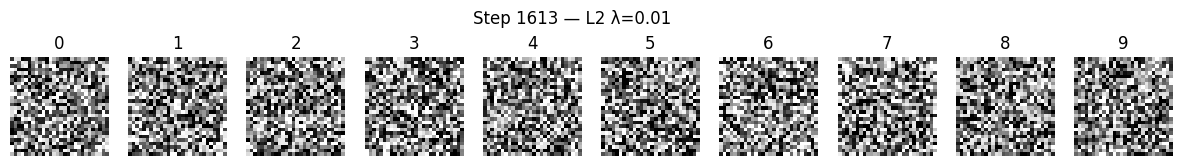

Predictions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

 L2 Penalty λ = 0.1
Step 0 — Loss: 5.3640, CE: 5.2641, L2: 0.1000
Step 50 — Loss: 2.6394, CE: 2.5893, L2: 0.0502
Step 100 — Loss: 1.3349, CE: 1.2858, L2: 0.0491
Step 150 — Loss: 0.5293, CE: 0.4809, L2: 0.0484
Step 200 — Loss: 0.1969, CE: 0.1490, L2: 0.0479
Step 250 — Loss: 0.1258, CE: 0.0781, L2: 0.0476
Step 300 — Loss: 0.0995, CE: 0.0522, L2: 0.0473
Step 350 — Loss: 0.0857, CE: 0.0386, L2: 0.0471
Step 400 — Loss: 0.0771, CE: 0.0303, L2: 0.0468
Step 450 — Loss: 0.0714, CE: 0.0248, L2: 0.0466
Step 500 — Loss: 0.0671, CE: 0.0208, L2: 0.0463
Step 550 — Loss: 0.0639, CE: 0.0178, L2: 0.0461
Step 600 — Loss: 0.0613, CE: 0.0155, L2: 0.0458


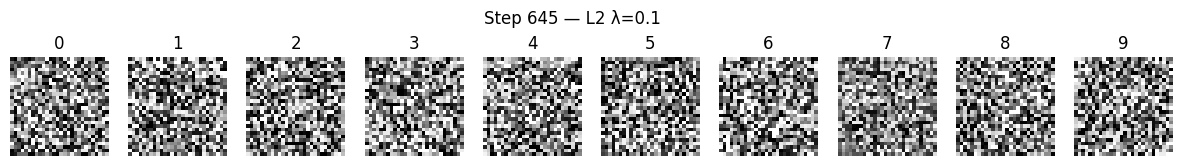

Predictions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

 L2 Penalty λ = 1.0
Step 0 — Loss: 5.2065, CE: 4.2050, L2: 1.0015
Step 50 — Loss: 2.1323, CE: 1.6281, L2: 0.5042
Step 100 — Loss: 1.0224, CE: 0.5289, L2: 0.4935
Step 150 — Loss: 0.6671, CE: 0.1814, L2: 0.4857
Step 200 — Loss: 0.5736, CE: 0.0945, L2: 0.4791
Step 250 — Loss: 0.5329, CE: 0.0606, L2: 0.4723
Step 300 — Loss: 0.5085, CE: 0.0433, L2: 0.4652
Step 350 — Loss: 0.4911, CE: 0.0334, L2: 0.4577
Step 400 — Loss: 0.4769, CE: 0.0270, L2: 0.4499
Step 450 — Loss: 0.4643, CE: 0.0226, L2: 0.4417
Step 500 — Loss: 0.4528, CE: 0.0195, L2: 0.4334
Step 550 — Loss: 0.4418, CE: 0.0170, L2: 0.4248
Step 600 — Loss: 0.4312, CE: 0.0152, L2: 0.4161
Step 650 — Loss: 0.4209, CE: 0.0136, L2: 0.4072
Step 700 — Loss: 0.4107, CE: 0.0124, L2: 0.3983
Step 750 — Loss: 0.4008, CE: 0.0114, L2: 0.3893
Step 800 — Loss: 0.3909, CE: 0.0106, L2: 0.3803
Step 850 — Loss: 0.3813, CE: 0.0099, L2: 0.3714
Step 900 — Loss: 0.3717, CE: 0.0093, L2: 0.3624
Step 950 — Loss: 0.3623, C

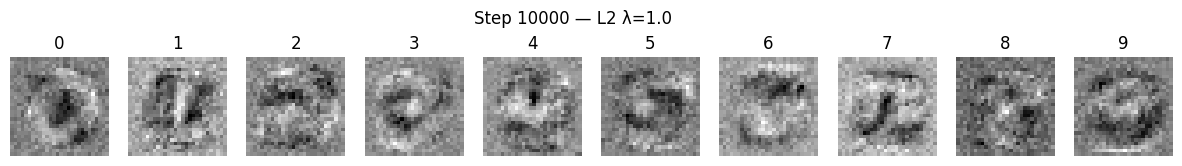

Predictions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

 L2 Penalty λ = 10.0
Step 0 — Loss: 13.4712, CE: 3.6843, L2: 9.7869
Step 50 — Loss: 6.3215, CE: 1.4112, L2: 4.9103
Step 100 — Loss: 5.1647, CE: 0.5322, L2: 4.6325
Step 150 — Loss: 4.5529, CE: 0.2188, L2: 4.3341
Step 200 — Loss: 4.1570, CE: 0.1325, L2: 4.0245
Step 250 — Loss: 3.8177, CE: 0.1006, L2: 3.7171
Step 300 — Loss: 3.5053, CE: 0.0843, L2: 3.4210
Step 350 — Loss: 3.2145, CE: 0.0741, L2: 3.1404
Step 400 — Loss: 2.9439, CE: 0.0673, L2: 2.8767
Step 450 — Loss: 2.6925, CE: 0.0624, L2: 2.6301
Step 500 — Loss: 2.4595, CE: 0.0588, L2: 2.4007
Step 550 — Loss: 2.2438, CE: 0.0557, L2: 2.1881
Step 600 — Loss: 2.0450, CE: 0.0533, L2: 1.9917
Step 650 — Loss: 1.8618, CE: 0.0510, L2: 1.8109
Step 700 — Loss: 1.6937, CE: 0.0491, L2: 1.6446
Step 750 — Loss: 1.5394, CE: 0.0473, L2: 1.4921
Step 800 — Loss: 1.3980, CE: 0.0455, L2: 1.3525
Step 850 — Loss: 1.2688, CE: 0.0438, L2: 1.2251
Step 900 — Loss: 1.1512, CE: 0.0423, L2: 1.1088
Step 950 — Loss: 1.0441,

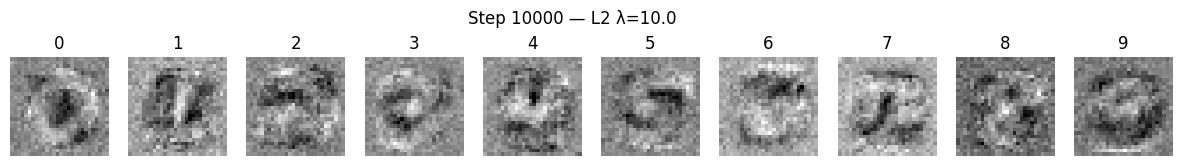

Predictions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [34]:

# Define different regularization strengths to test
lambdas = [0.001, 0.01, 0.1, 1.0, 10.0]

for lambda_l2 in lambdas:
    print(f"\n L2 Penalty λ = {lambda_l2}")

    # Create trainable noise batch: 10 images
    dreamed_imgs = torch.nn.Parameter(torch.randn(10, 1, 28, 28, device=device))
    target_labels = torch.arange(10, device=device)
    optimizer = torch.optim.Adam([dreamed_imgs], lr=0.001)

    confidences = torch.zeros(10, device=device)
    step = 0

    while torch.all(confidences < 0.999) and step < 10000:

        # Save frame for current step and lambda
        if step % 50 == 0:
          images_cpu = dreamed_imgs.detach().cpu()
          fig, axs = plt.subplots(1, 10, figsize=(15, 2))
          for i in range(10):
              axs[i].imshow(images_cpu[i][0], cmap='gray', vmin=-1.0, vmax=1.0)
              axs[i].axis('off')
              axs[i].set_title(str(i))
          plt.suptitle(f"Step {step} — L2 λ={lambda_l2}")
          plt.savefig(f"step_{step:05d}_lambda_{lambda_l2:.3f}.png")
          plt.close(fig)

        optimizer.zero_grad()
        output = net(dreamed_imgs)  # Shape: [10, 10]
        ce_loss = torch.nn.functional.cross_entropy(output, target_labels)  # classification loss
        l2_penalty = lambda_l2 * dreamed_imgs.pow(2).mean()  # L2 penalty on pixel intensity

        loss = ce_loss + l2_penalty
        loss.backward()
        optimizer.step()

        with torch.no_grad():
          probs = torch.softmax(output, dim=1)
          confidences = probs[torch.arange(10), target_labels]

        with torch.no_grad():
            dreamed_imgs.clamp_(-1.0, 1.0)

        if step % 50 == 0:
            print(f"Step {step} — Loss: {loss.item():.4f}, CE: {ce_loss.item():.4f}, L2: {l2_penalty.item():.4f}")

        step += 1

    # Visualization
    images_cpu = dreamed_imgs.detach().cpu()
    fig, axs = plt.subplots(1, 10, figsize=(15, 2))
    for i in range(10):
        axs[i].imshow(images_cpu[i][0], cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(str(i))
    plt.suptitle(f"Step {step} — L2 λ={lambda_l2}")
    plt.savefig(f"step_{step:05d}_lambda_{lambda_l2:.3f}.png")
    plt.show()

    # Prediction check
    with torch.no_grad():
        predictions = torch.argmax(net(dreamed_imgs), dim=1)
        print("Predictions:", predictions.cpu().tolist())


In [35]:
lambdas = [0.001, 0.01, 0.1, 1.0, 10.0]

for lambda_l2 in lambdas:
    pattern = f"step_*_lambda_{lambda_l2:.3f}.png"
    frame_paths = sorted(glob.glob(pattern))
    frames = [imageio.v2.imread(fp) for fp in frame_paths]
    output_path = f"dream_lambda_{lambda_l2:.3f}.mp4"
    imageio.mimsave(output_path, frames, fps=10)  # Adjust fps if needed
    files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Question: Are the new digits recognized correctly? How does the penalty impact the digit quality? Explain

We can see that the new digits were not recognized correctly for small L2 penalty values such as  $\lambda$ = 0.001, 0.01, or 0.1.

When increasing the L2 penalty to  $\lambda$ = 1, the results significantly improved: the generated digits became more human-recognizable. A similar effect occurred for  $\lambda$ = 10, where the digits were also readable.

This improvement happens because the L2 penalty acts as a regularizer, preventing the optimizer from using extreme pixel values just to fool the network. It adds a cost for having large-valued pixels. So as $\lambda$ increases, the optimizer is "afraid" to activate pixels strongly, it prefers to keep them near zero. It encourages solutions that are more "distributed" and smoother.

However, when  $\lambda$ is too large, the L2 term dominates the loss, and the optimizer prioritizes minimizing pixel intensity over classification. As a result, the network may lose confidence (in this case it takes too many steps to reach the necessary confidence) because the generated images become too smooth, lacking enough signal to clearly activate the target class.

In short:
- **Low $\lambda$**: We get sharp, noisy, unnatural digits.
- **Moderate $\lambda$**: We get smoother images, more digit-like structure
- **High $\lambda$**: Readable digits, but sometimes lower confidence due to overly suppressed features
